In [1]:
import os
import re
import emoji
import numpy as np
import unicodedata
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.metrics import roc_auc_score
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#pca
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


# Tratamiento de datos
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection         import StratifiedKFold
from sklearn.model_selection         import validation_curve

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')


#modelado TSE MDS
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler

#from sklearn.linear_model            import LinearRegression, LogisticRegression, Ridge, RidgeCV
from sklearn.svm                     import SVC
from sklearn.ensemble                import RandomForestClassifier
from sklearn.ensemble                import GradientBoostingClassifier
from sklearn.preprocessing           import LabelEncoder,OneHotEncoder
from sklearn.model_selection         import StratifiedKFold
from sklearn.model_selection         import validation_curve
from sklearn.model_selection         import learning_curve
from sklearn.model_selection         import train_test_split
from sklearn.metrics                 import confusion_matrix
from sklearn.metrics                 import accuracy_score
from sklearn.model_selection         import train_test_split
from sklearn.model_selection         import cross_val_predict
from sklearn.model_selection         import cross_val_score
from sklearn                         import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition           import TruncatedSVD
from sklearn.naive_bayes             import GaussianNB
from sklearn.metrics         import roc_curve, roc_auc_score

import itertools
import collections
import csv

# Tunning plots
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline
pd.set_option('display.max_columns', 100)
SEED = 15432

from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [87]:
df=pd.read_csv("C:/Users/MX03932000/Documents/Personales/Mod_3/p1/df.csv")

In [88]:
df.fraud.value_counts(1)

0    0.987892
1    0.012108
Name: fraud, dtype: float64

In [89]:
X=df[['age', 'amount', 'debt', 'term', 'enrichment_RAD', 'enrichment_TAX',
       'enrichment_B', 'gender_F', 'merchant_M1823072687',
       'category_es_transportation']]
y=df[["fraud"]]

In [90]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'fraud': 1})


In [91]:
ss = StandardScaler()
df_transformed = ss.fit_transform(X_res)
df_transformed

array([[ 0.82615504, -0.43105177, -0.38841568, ..., -1.36531085,
        -0.58517583,  1.15150286],
       [ 0.82615504, -0.41575058, -0.36276413, ...,  0.73243394,
        -0.58517583, -0.86843032],
       [ 0.82615504, -0.38021382, -0.31156052, ..., -1.36531085,
        -0.58517583,  1.15150286],
       ...,
       [ 0.05248865, -0.29631407, -0.31384266, ...,  0.73243394,
        -0.58517583, -0.86843032],
       [-0.72117775, -0.12286419, -0.14229503, ..., -1.36531085,
        -0.58517583, -0.86843032],
       [-0.72117775, -0.13586164, -0.27996937, ...,  0.73243394,
        -0.58517583, -0.86843032]])

In [92]:
pca=PCA(n_components=2)

In [93]:
pca.fit(df_transformed)

PCA(n_components=2)

In [94]:
pca.explained_variance_ratio_

array([0.25074397, 0.18948369])

In [95]:
pca.explained_variance_ratio_.cumsum()

array([0.25074397, 0.44022766])

In [96]:
Xp = pd.DataFrame(pca.transform(df_transformed),columns=['p1','p2'])

In [97]:
Xp['label'] = y_res

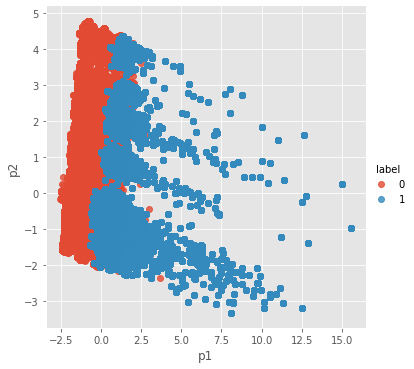

In [98]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='label')


In [12]:
#modelado con transformación pca

In [13]:
#pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier

In [14]:
Xp

,p1,p2,label
0,-34742.390846,-716.612503,0
1,-23955.676896,1495.092534,0
2,671.895403,5069.106596,0
3,-7634.855598,-4227.000296,0
4,-940.127293,4284.351747,0
...,...,...,...
594638,259884.730943,55784.795850,1
594639,215311.774856,-48130.844951,1
594640,24961.642186,-10610.132358,0
594641,107676.678977,10160.429933,1


In [15]:
X=Xp.drop(columns=["label"])
y=Xp[["label"]]

In [16]:
from collections import Counter
from sklearn.datasets import make_classification

In [17]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'label': 1})


In [18]:
y_res.shape

(1174886, 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=1)

In [22]:
#regresión logistíca (l2)
C_values=np.logspace(-4,6,10, base=10)
C_values

array([1.00000000e-04, 1.29154967e-03, 1.66810054e-02, 2.15443469e-01,
       2.78255940e+00, 3.59381366e+01, 4.64158883e+02, 5.99484250e+03,
       7.74263683e+04, 1.00000000e+06])

In [23]:
SEED=12345
N_JOBS= -1
cv_schema=StratifiedKFold(n_splits=3,random_state=SEED,shuffle=True)
estimators=[]
estimators.append(('logit_model_l2',LogisticRegression()))

In [24]:
pipeline=Pipeline(estimators) 

In [25]:
pipeline.set_params(logit_model_l2__penalty='l2')
pipeline.set_params(logit_model_l2__random_state=SEED)
pipeline.set_params(logit_model_l2__solver='lbfgs')
pipeline.set_params(logit_model_l2__n_jobs=N_JOBS)
pipeline

Pipeline(steps=[('logit_model_l2',
                 LogisticRegression(n_jobs=-1, random_state=12345))])

In [26]:
train_scores, test_scores=validation_curve(pipeline,X_train, y_train,
                                         param_name="logit_model_l2__C",
                                         param_range=C_values,
                                         cv=cv_schema,
                                         scoring="accuracy",n_jobs=N_JOBS)

In [27]:
train_score_mean_cv=np.mean(train_scores,axis=1)
test_score_mean_cv=np.mean(test_scores,axis=1)

In [28]:
choose_index_list=list(np.array(test_score_mean_cv)-np.abs((np.array(train_score_mean_cv)-np.array(test_score_mean_cv))))
choose_index=choose_index_list.index(np.max(choose_index_list))
#guarda el optimo
opt_para=C_values[choose_index]


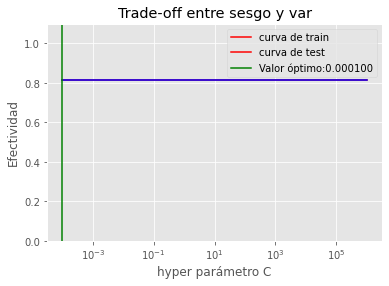

In [29]:
#curvas de efectividad
import matplotlib.lines as mlines
def plot_score_metric_train_test (SM_list_train,SM_list_test,param_range,choose_index,value_parameter,symbol_parameter):
    plt.plot(param_range,SM_list_train,color="r")
    plt.plot(param_range,SM_list_test,color="b")
    plt.axvline(x=opt_para,color="g")
    plt.title("Trade-off entre sesgo y var")
    plt.xlabel("hyper parámetro {0}".format(symbol_parameter))
    plt.ylabel("Efectividad")
    plt.ylim(0.0,1.1)
    plt.xscale('log')
    
    train=mlines.Line2D([],[],color="r",marker='',
                       markersize=15,label="curva de train")
    test=mlines.Line2D([],[],color="r",marker='',
                       markersize=15,label="curva de test")
    opt_value=mlines.Line2D([],[],color='g',marker='',
                           markersize=15,label="Valor óptimo:{0:5f}".format(value_parameter))
    plt.legend(handles=[train,test,opt_value])
    plt.show()

#grafica curvas de perfomance
plot_score_metric_train_test(train_score_mean_cv,test_score_mean_cv,C_values,choose_index,opt_para,"C")

In [30]:
print("Valor óptimo para C es {0:.5f}".format(opt_para))

Valor óptimo para C es 0.00010


In [31]:
#print métricas
def print_cv_validation_scores(parameter,train_accu_mean_scores,test_accu_mean_scores ):
    dash='-'*100
    print(dash)
    print("{:<30s}{:<35s}{:<25s}".format("Valor del hyper parámetro","Efectividad media de test","Efectividad media de train"))
    print(dash)
    for i in range (len(parameter)):
        print("{:<30f}{:<35f}{:<25f}".format(parameter[i], train_accu_mean_scores[i], test_accu_mean_scores[i]))
    print(dash)
print_cv_validation_scores(C_values,train_score_mean_cv,test_score_mean_cv)
  

----------------------------------------------------------------------------------------------------
Valor del hyper parámetro     Efectividad media de test          Efectividad media de train
----------------------------------------------------------------------------------------------------
0.000100                      0.815887                           0.815935                 
0.001292                      0.815887                           0.815935                 
0.016681                      0.815887                           0.815935                 
0.215443                      0.815887                           0.815935                 
2.782559                      0.815887                           0.815935                 
35.938137                     0.815887                           0.815935                 
464.158883                    0.815887                           0.815935                 
5994.842503                   0.815887                           0.81

In [32]:
#modelo final con hyperparametro ´´optimo
pipeline.set_params(logit_model_l2__C=opt_para)
logit_model_l2=pipeline.named_steps["logit_model_l2"]
logit_model_l2.fit(X_train,y_train)
accu_logit_model_l2=logit_model_l2.score(X_test,y_test)
print("Efectividad del modelo:{0:2f}%".format(100*accu_logit_model_l2))

Efectividad del modelo:81.555668%


In [33]:
#predicción
y_pred_logit=logit_model_l2.predict(X_test)
y_pred_proba_logit=logit_model_l2.predict_proba(X_test)

In [34]:
def grafica_matriz_confusion(cm, classes=[0,1], normalize=False, title='Matriz de confusión\n', cmap=plt.cm.Reds):
    """ 
    Función para mostrar la matriz de confusión de un problema de clasificación binario. 
    El parámetro cm puede ser el objeto resultante de ejecutar la función confusion_matrix() de la librería sklearn.
    
    Args:
        cm         matriz de confusión de sklearn
        classes    categorías de la variable target
        normalize  normaliza asignando el parámetro True
        title      string para definir el título para la gráfica
        cmap       mapa de colores
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max()
    text = [["VN =", "FN ="], ["FP =", "VP ="]]
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "     {}".format(round (cm[i, j],2)), horizontalalignment="left",
                 color="white" if cm[i, j] > thresh else "black")
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, text[j][i] , horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Valor real')
    plt.xlabel('Predicción')
    
def grafica_curva_roc(fpr, tpr, title='Curva ROC', note=''):
    """
    Función para graficar la curva ROC
    Los parámetros fpr y tpr son el output de ejecutar la función roc_curve de sklearn
    
    Args:
        fpr        Tasa de falsos positivos 
        tpr        Tasa de verdaderos positivos
        title      sting para definir el título de la gráfica
        note       Nota para mostrar en la gráfica
    """
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('Tasa de falsos positivos ')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title(title)
    if note: plt.text(0.6, 0.2, note)
    plt.show()

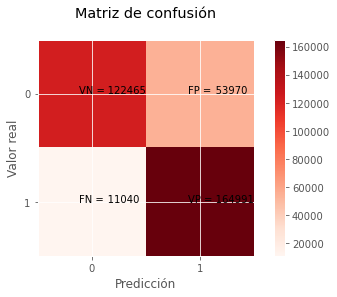

In [35]:
#muestra matriz
matriz_conf_logit=confusion_matrix(y_test,y_pred_logit)
grafica_matriz_confusion(matriz_conf_logit, classes=[0,1], normalize=False, title='Matriz de confusión\n', cmap=plt.cm.Reds)

In [36]:
#f1
error_logit=matriz_conf_logit[0][0]/(matriz_conf_logit[0][0]+matriz_conf_logit[0][1])
print("F1=",error_logit)


F1= 0.6941083118428883


In [37]:
#errores
error_logit=matriz_conf_logit[0][1]+matriz_conf_logit[1][0]
print("No. errores=",error_logit)
print("% errores=",error_logit/len(y_pred_logit))

No. errores= 65010
% errores= 0.18444332219277887


In [38]:
#calculo de efectividad
efect_logit=matriz_conf_logit[0][0]+matriz_conf_logit[1][1]
print("aciertos=",efect_logit)
print("% efectividad=",efect_logit/len(y_pred_logit))

aciertos= 287456
% efectividad= 0.8155566778072211


In [39]:
#calculo de recall
recall_logit=matriz_conf_logit[1][1]/(matriz_conf_logit[1][1]+matriz_conf_logit[1][0])
precision_logit=matriz_conf_logit[1][1]/(matriz_conf_logit[1][1]+matriz_conf_logit[0][1])
print("recall=",recall_logit)
print("precisión=",precision_logit)

recall= 0.9372837738807369
precisión= 0.7535177497362544


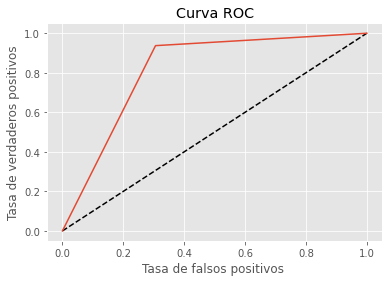

In [40]:
#tasa falsos positivos
fpr_logit,tpr_logit,_=roc_curve(y_test,y_pred_logit)
auc_logit=roc_auc_score(y_test,y_pred_logit)
grafica_curva_roc(fpr_logit, tpr_logit, title='Curva ROC', note='')

In [41]:
#modelo l1

In [42]:
C_values=np.logspace(-4,6,10, base=10)
C_values

array([1.00000000e-04, 1.29154967e-03, 1.66810054e-02, 2.15443469e-01,
       2.78255940e+00, 3.59381366e+01, 4.64158883e+02, 5.99484250e+03,
       7.74263683e+04, 1.00000000e+06])

In [43]:
SEED=12345
N_JOBS= -1
cv_schema=StratifiedKFold(n_splits=3,random_state=SEED,shuffle=True)
estimators=[]
estimators.append(('logit_model_l1',LogisticRegression()))

In [44]:
pipeline=Pipeline(estimators)

In [45]:
pipeline.set_params(logit_model_l1__penalty='l1')
pipeline.set_params(logit_model_l1__random_state=SEED)
pipeline.set_params(logit_model_l1__solver='saga')
pipeline.set_params(logit_model_l1__n_jobs=N_JOBS)
pipeline

Pipeline(steps=[('logit_model_l1',
                 LogisticRegression(n_jobs=-1, penalty='l1', random_state=12345,
                                    solver='saga'))])

In [46]:
train_scores, test_scores=validation_curve(pipeline,X_train, y_train,
                                         param_name="logit_model_l1__C",
                                         param_range=C_values,
                                         cv=cv_schema,
                                         scoring="accuracy",n_jobs=N_JOBS)

In [47]:
train_score_mean_cv=np.mean(train_scores,axis=1)
test_score_mean_cv=np.mean(test_scores,axis=1)

In [48]:
choose_index_list=list(np.array(test_score_mean_cv)-np.abs((np.array(train_score_mean_cv)-np.array(test_score_mean_cv))))
choose_index=choose_index_list.index(np.max(choose_index_list))
#guarda el optimo
opt_para=C_values[choose_index]

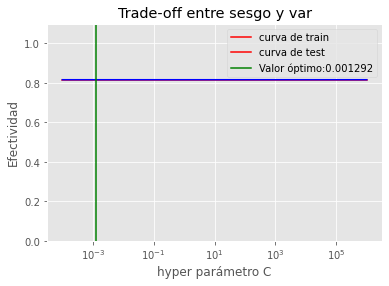

In [49]:
#grafica curvas de perfomance
plot_score_metric_train_test(train_score_mean_cv,test_score_mean_cv,C_values,choose_index,opt_para,"C")

In [50]:
print("Valor óptimo para C es {0:.5f}".format(opt_para))

Valor óptimo para C es 0.00129


In [51]:
print_cv_validation_scores(C_values,train_score_mean_cv,test_score_mean_cv)
    

----------------------------------------------------------------------------------------------------
Valor del hyper parámetro     Efectividad media de test          Efectividad media de train
----------------------------------------------------------------------------------------------------
0.000100                      0.815888                           0.815938                 
0.001292                      0.815888                           0.815937                 
0.016681                      0.815888                           0.815937                 
0.215443                      0.815888                           0.815937                 
2.782559                      0.815888                           0.815937                 
35.938137                     0.815888                           0.815937                 
464.158883                    0.815888                           0.815937                 
5994.842503                   0.815888                           0.81

In [52]:
#modelo final con hyperparametro ´´optimo
pipeline.set_params(logit_model_l1__C=opt_para)
logit_model_l1=pipeline.named_steps["logit_model_l1"]
logit_model_l1.fit(X_train,y_train)
accu_logit_model_l1=logit_model_l1.score(X_test,y_test)
print("Efectividad del modelo:{0:2f}%".format(100*accu_logit_model_l1))

Efectividad del modelo:81.555100%


In [53]:
#predicción
y_pred_logit=logit_model_l1.predict(X_test)
y_pred_proba_logit=logit_model_l1.predict_proba(X_test)

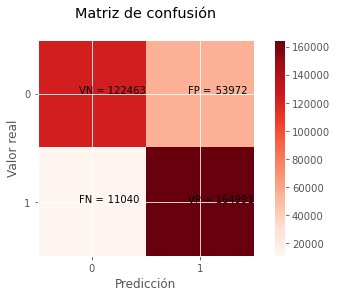

In [54]:
#muestra matriz
matriz_conf_logit=confusion_matrix(y_test,y_pred_logit)
grafica_matriz_confusion(matriz_conf_logit, classes=[0,1], normalize=False, title='Matriz de confusión\n', cmap=plt.cm.Reds)

In [55]:
#f1
error_logit=matriz_conf_logit[0][0]/(matriz_conf_logit[0][0]+matriz_conf_logit[0][1])
print("F1=",error_logit)

F1= 0.6940969762235384


In [56]:
#errores
error_logit=matriz_conf_logit[0][1]+matriz_conf_logit[1][0]
print("No. errores=",error_logit)
print("% errores=",error_logit/len(y_pred_logit))

No. errores= 65012
% errores= 0.18444899649895308


In [57]:
#calculo de efectividad
efect_logit=matriz_conf_logit[0][0]+matriz_conf_logit[1][1]
print("aciertos=",efect_logit)
print("% efectividad=",efect_logit/len(y_pred_logit))

aciertos= 287454
% efectividad= 0.8155510035010469


In [58]:
#calculo de recall
recall_logit=matriz_conf_logit[1][1]/(matriz_conf_logit[1][1]+matriz_conf_logit[1][0])
precision_logit=matriz_conf_logit[1][1]/(matriz_conf_logit[1][1]+matriz_conf_logit[0][1])
print("recall=",recall_logit)
print("precisión=",precision_logit)

recall= 0.9372837738807369
precisión= 0.7535108671328032


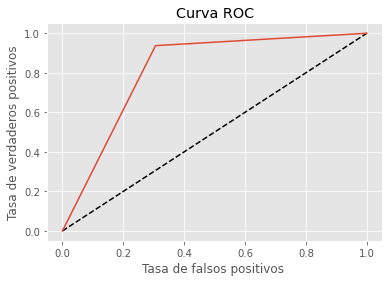

In [59]:
#tasa falsos positivos
fpr_logit,tpr_logit,_=roc_curve(y_test,y_pred_logit)
auc_logit=roc_auc_score(y_test,y_pred_logit)
grafica_curva_roc(fpr_logit, tpr_logit, title='Curva ROC', note='')

In [60]:
#arbol de decisión 
from sklearn.tree import DecisionTreeClassifier

In [61]:
 
C_values=[5,6,7,8,9,10,11,12,13,14]
C_values

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [62]:
SEED=12345
N_JOBS= -1
cv_schema=StratifiedKFold(n_splits=3,random_state=SEED,shuffle=True)
estimators=[]
estimators.append(('DT',DecisionTreeClassifier(random_state=SEED)))

In [63]:
pipeline=Pipeline(estimators) 

In [64]:
pipeline.set_params(DT__criterion='gini')
pipeline.set_params(DT__random_state=SEED)
pipeline

Pipeline(steps=[('DT', DecisionTreeClassifier(random_state=12345))])

In [65]:
train_scores, test_scores=validation_curve(pipeline,X_train, y_train,
                                         param_name="DT__max_depth",
    param_range=C_values, cv=10, scoring="r2",n_jobs=N_JOBS)

In [66]:
train_score_mean_cv=np.mean(train_scores,axis=1)
test_score_mean_cv=np.mean(test_scores,axis=1)

In [67]:
choose_index_list=list(np.array(test_score_mean_cv)-np.abs((np.array(train_score_mean_cv)-np.array(test_score_mean_cv))))
choose_index=choose_index_list.index(np.max(choose_index_list))
#guarda el optimo
opt_para=C_values[choose_index]

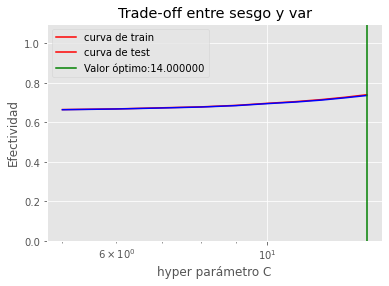

In [68]:
#grafica curvas de perfomance
plot_score_metric_train_test(train_score_mean_cv,test_score_mean_cv,C_values,choose_index,opt_para,"C")

In [69]:
print("Valor óptimo para C es {0:.5f}".format(opt_para))

Valor óptimo para C es 14.00000


In [70]:
#print métricas

print_cv_validation_scores(C_values,train_score_mean_cv,test_score_mean_cv)
    

----------------------------------------------------------------------------------------------------
Valor del hyper parámetro     Efectividad media de test          Efectividad media de train
----------------------------------------------------------------------------------------------------
5.000000                      0.664922                           0.664050                 
6.000000                      0.668246                           0.667858                 
7.000000                      0.673985                           0.672926                 
8.000000                      0.678705                           0.677800                 
9.000000                      0.686161                           0.684905                 
10.000000                     0.696496                           0.694934                 
11.000000                     0.705137                           0.703037                 
12.000000                     0.715348                           0.71

In [71]:
#modelo final con hyperparametro ´´optimo
pipeline.set_params(DT__max_depth=opt_para)
logit_model_l1=pipeline.named_steps["DT"]
logit_model_l1.fit(X_train,y_train)
accu_logit_model_l1=logit_model_l1.score(X_test,y_test)
print("Efectividad del modelo:{0:2f}%".format(100*accu_logit_model_l1))

Efectividad del modelo:93.494975%


In [72]:
#predicción
y_pred_logit=logit_model_l1.predict(X_test)
y_pred_proba_logit=logit_model_l1.predict_proba(X_test)

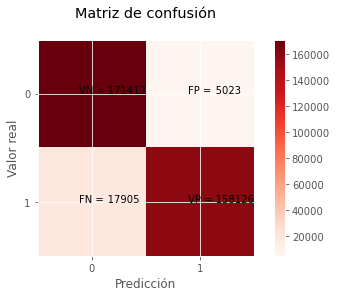

In [73]:
#muestra matriz
matriz_conf_logit=confusion_matrix(y_test,y_pred_logit)
grafica_matriz_confusion(matriz_conf_logit, classes=[0,1], normalize=False, title='Matriz de confusión\n', cmap=plt.cm.Reds)

In [74]:
#f1
error_logit=matriz_conf_logit[0][0]/(matriz_conf_logit[0][0]+matriz_conf_logit[0][1])
print("F1=",error_logit)

F1= 0.9715305920027205


In [75]:
#errores
error_logit=matriz_conf_logit[0][1]+matriz_conf_logit[1][0]
print("No. errores=",error_logit)
print("% errores=",error_logit/len(y_pred_logit))

No. errores= 22928
% errores= 0.06505024598117265


In [76]:
#calculo de efectividad
efect_logit=matriz_conf_logit[0][0]+matriz_conf_logit[1][1]
print("aciertos=",efect_logit)
print("% efectividad=",efect_logit/len(y_pred_logit))

aciertos= 329538
% efectividad= 0.9349497540188273


In [77]:
#calculo de recall
recall_logit=matriz_conf_logit[1][1]/(matriz_conf_logit[1][1]+matriz_conf_logit[1][0])
precision_logit=matriz_conf_logit[1][1]/(matriz_conf_logit[1][1]+matriz_conf_logit[0][1])
print("recall=",recall_logit)
print("precisión=",precision_logit)

recall= 0.8982849611716118
precisión= 0.9692121925356576


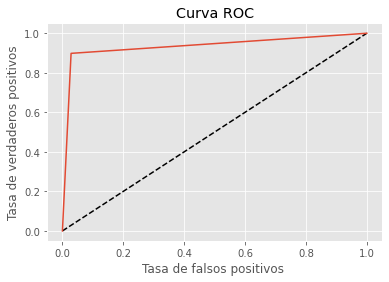

In [78]:
#tasa falsos positivos
fpr_logit,tpr_logit,_=roc_curve(y_test,y_pred_logit)
auc_logit=roc_auc_score(y_test,y_pred_logit)
grafica_curva_roc(fpr_logit, tpr_logit, title='Curva ROC', note='')

In [84]:
resultados=pd.DataFrame()
efectividad=["81.55%","81.55%","93.49%"]
f1=["69.41%","69.40%","97.15%"]
errores=["18.44%","18.44%","6.50%"]
recall=["93.72%","93.72%","89.82"]
precisión=["75.35%","75.35%","96.92%"]
modelo=["Reg L. (l1)","Reg L. (l2)","Árbol D"]

In [85]:
resultados["Modelo"]=modelo
resultados["Efectividad"]=efectividad
resultados["F1"]=f1
resultados["Errores"]=errores
resultados["Recall"]=recall
resultados["Precisión"]=precisión



In [86]:
resultados

,Modelo,Efectividad,F1,Errores,Recall,Precisión
0,Reg L. (l1),81.55%,69.41%,18.44%,93.72%,75.35%
1,Reg L. (l2),81.55%,69.40%,18.44%,93.72%,75.35%
2,Árbol D,93.49%,97.15%,6.50%,89.82,96.92%
